# Titanic Project

Problem Statement:
    
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 
It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, 
and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on
Titanic would survive the sinking or not. 

In [393]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [394]:
# Importing the dataset

titanic = pd.read_csv('titanic_train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

# Data Pre-Processing

In [395]:
# Checking the shape of the dataset
titanic.shape

(891, 12)

In [396]:
# Checking the sample data

titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S


In [397]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [398]:
# checking the information of the dataset

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [399]:
# checking the datatypes of the dataset

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [401]:
# Checking the unique values

titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [403]:
# Checking the value count os Survived as it is our target variable

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [404]:
# Checking the null values

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [405]:
# Finding missing ratio of dataset

titanic_null = titanic.isnull().sum()/len(titanic)*100
titanic_null = titanic_null.drop(titanic_null[titanic_null==0].index.sort_values(ascending=False))
titanic_null

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [406]:
# Dropping Cabin and Name Column

titanic = titanic.drop(columns=['Cabin','Name'],axis=1)

Dropped cabin column as we see 77% of data in that column are Null values

Name and Passenger ID is same so, dropping Name as the Passenger ID is integer unique value

In [407]:
titanic.shape

(891, 10)

In [408]:
# Replacing null values in Age column with Simple Imputer

from sklearn.impute import SimpleImputer

SI = SimpleImputer(strategy = 'mean')
titanic['Age'] = SI.fit_transform(titanic['Age'].values.reshape(-1,1))

In [409]:
SI2 = SimpleImputer(strategy = 'most_frequent')
titanic['Embarked'] = SI2.fit_transform(titanic['Embarked'].values.reshape(-1,1))

<AxesSubplot:>

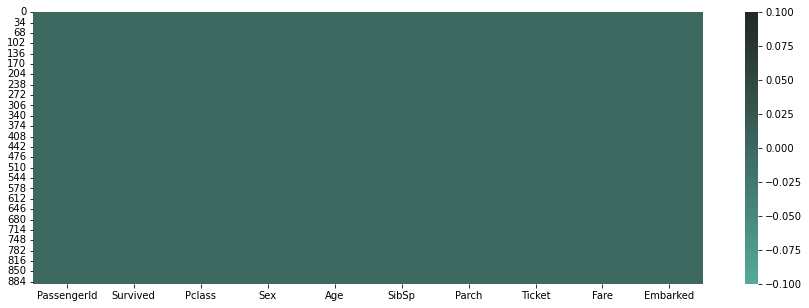

In [410]:
# Visualizing the null values with heatmap

plt.figure(figsize=(15,5))
sns.heatmap(titanic.isnull(),cmap=sns.color_palette("dark:#5A9_r", as_cmap=True))

Analysis:
    
Dataset contains 891 rows and 12 columns

Survived column is our target variable which contains 549 values in 0 and 342 values in 1,
0 as not Survived and 1 as Survived.

Null values were present in Cabin, Age and embarked in which Cabin got 77% of Null values.
So dropped that column as it will not help us in predicting the model

Age contains 19% of Null values, which was replaced by Mean using Simple Imputer

Passennger ID and Name both contains 891 unique value were we can drop passenger ID as it will not help us in 
Model prediction

# Data Visualization

Text(0, 0.5, 'Count')

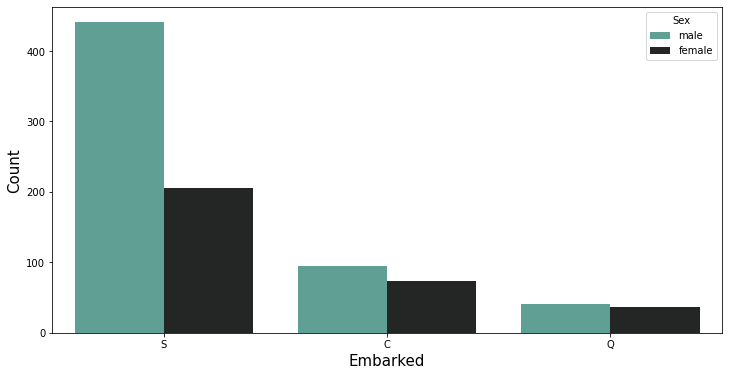

In [411]:
# Checking count of passengers gender by embarked using countplot

plt.figure(figsize=(12,6))
sns.countplot(x='Embarked', hue='Sex',data = titanic,palette="dark:#5A9_r")
plt.xlabel('Embarked',fontsize=15)
plt.ylabel('Count',fontsize=15)


Text(0, 0.5, 'Count')

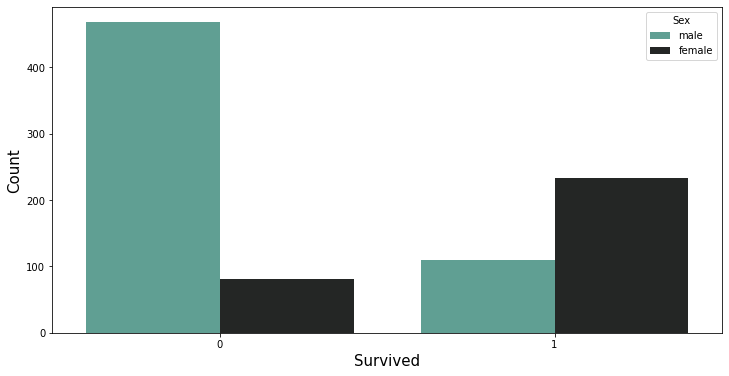

In [412]:
# Checking count of survived passengers gender using countplot

plt.figure(figsize=(12,6))
sns.countplot(x='Survived', hue='Sex',data = titanic,palette="dark:#5A9_r")
plt.xlabel('Survived',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

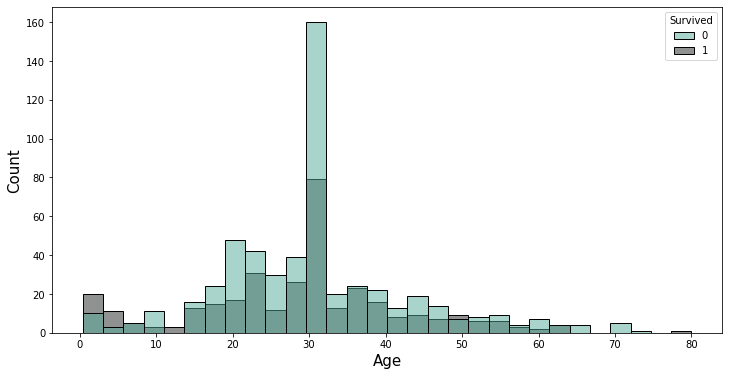

In [413]:
# Checking age range of passengers Survived using histplot

plt.figure(figsize=(12,6))
sns.histplot(x='Age', hue='Survived',data = titanic,palette="dark:#5A9_r")
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

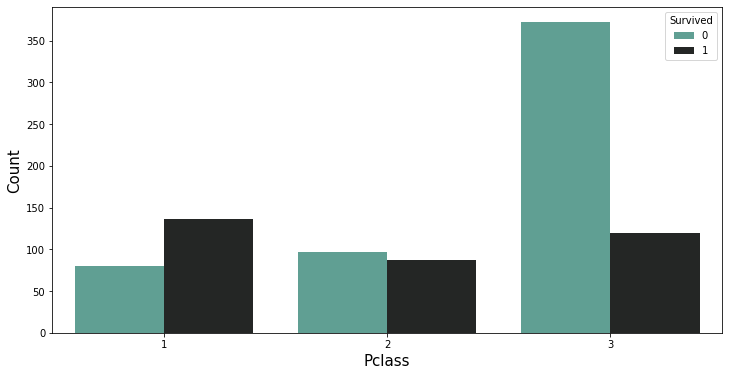

In [414]:
# Checking age range of passengers Survived using histplot

plt.figure(figsize=(12,6))
sns.countplot(x='Pclass', hue='Survived',data = titanic,palette="dark:#5A9_r")
plt.xlabel('Pclass',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

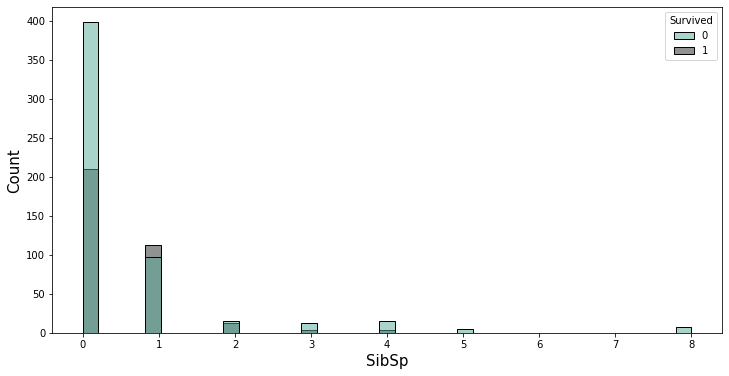

In [415]:
# Checking age range of passengers Survived using histplot

plt.figure(figsize=(12,6))
sns.histplot(x='SibSp', hue='Survived',data = titanic,palette="dark:#5A9_r")
plt.xlabel('SibSp',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

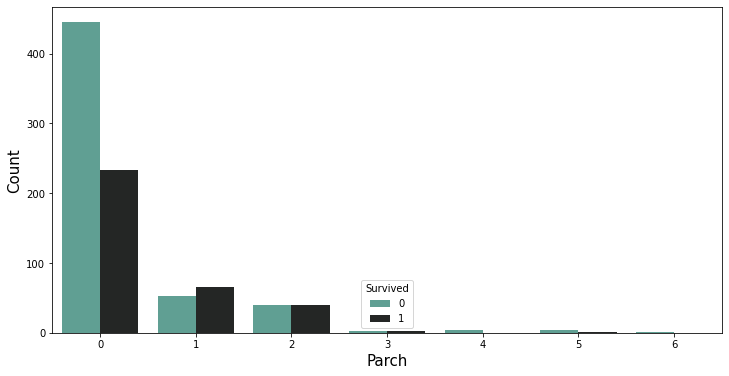

In [416]:
# Checking age range of passengers Survived using histplot

plt.figure(figsize=(12,6))
sns.countplot(x='Parch', hue='Survived',data = titanic,palette="dark:#5A9_r")
plt.xlabel('Parch',fontsize=15)
plt.ylabel('Count',fontsize=15)

In [417]:
titanic.shape

(891, 10)

Analysis:
    
Overall Male count is high compared with female

Female have survived more than Male

Both survived and death age range is high between 20 to 40 years of age

People travelled in Pclass - 3 survived less when compared to 1st and 2nd class

# Data Feature Selection and Engineering

In [602]:
# Applying Label encoder to categorical columns Sex,tickets and Embarked for further analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in titanic.columns:
    if(titanic[i].dtypes=='object'):
        titanic[i]=le.fit_transform(titanic[i].values.reshape(-1,1))
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,2
1,2,1,1,0,38.000000,1,0,596,71.2833,0
2,3,1,3,0,26.000000,0,0,669,7.9250,2
3,4,1,1,0,35.000000,1,0,49,53.1000,2
4,5,0,3,1,35.000000,0,0,472,8.0500,2
5,6,0,3,1,29.699118,0,0,275,8.4583,1
6,7,0,1,1,54.000000,0,0,85,51.8625,2
7,8,0,3,1,2.000000,3,1,395,21.0750,2
8,9,1,3,0,27.000000,0,2,344,11.1333,2
9,10,1,2,0,14.000000,1,0,132,30.0708,0


In [603]:
# Checking the datset with describe function


titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


Analysis:

We dont find any null values as the count are same

Mean is greater than Median in columns Survived, SibSp,Parch and Fare

Outliers are present in few columns  PassengerID, Ticket,Fare

In [604]:
# Checking the correlation of the dataset

titanic.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Ticket        -0.164549
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

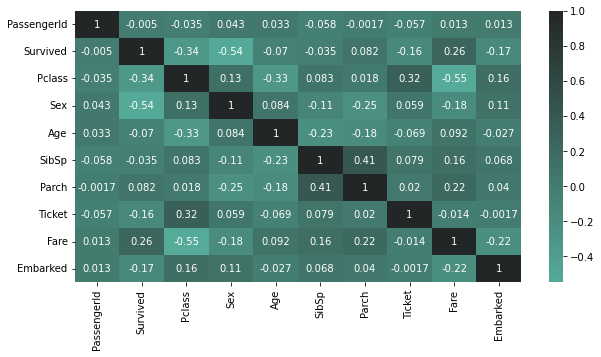

In [605]:
# Checking the Correlation by heatmap

plt.figure(figsize=(10,5))
sns.heatmap(titanic.corr(),annot = True, cmap =sns.color_palette("dark:#5A9_r", as_cmap=True))

Analysis:

Below are the negatively correlated features with target

Sex           
Pclass        
Ticket        
Embarked     
Age       
SibSp         
PassengerId

Below are the negatively correlated features with target

Parch
Fare

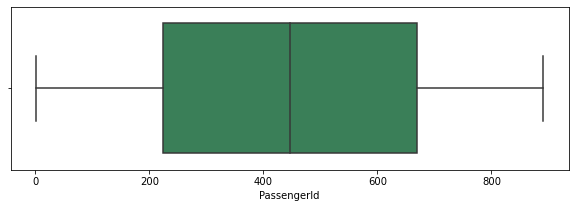

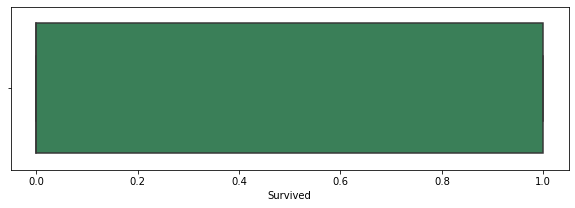

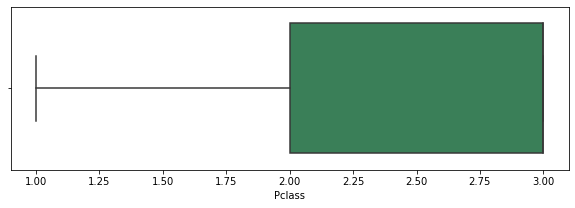

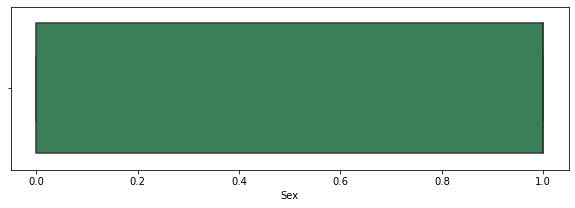

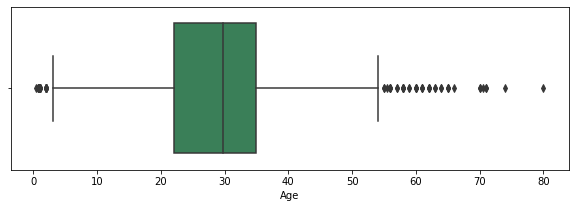

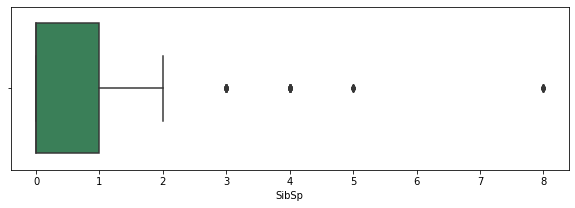

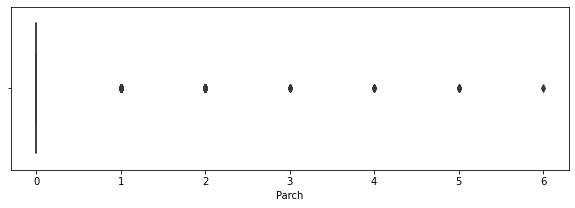

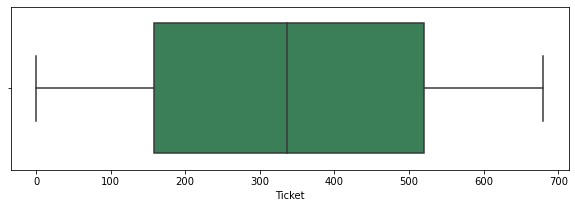

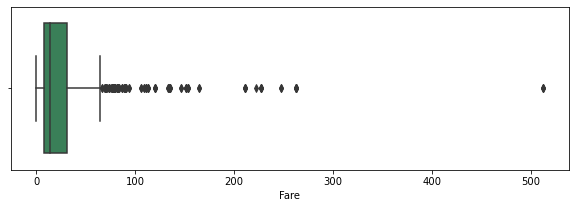

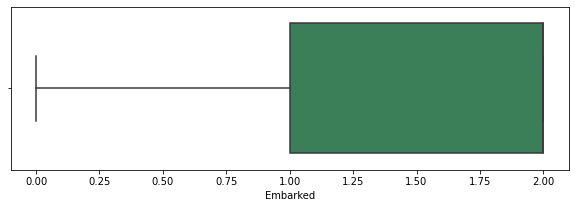

In [606]:
# Checking outliers by boxplot

for i in titanic.columns:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=titanic[i],color="seagreen")

In [607]:
# Removing outliers by Zscore

from scipy.stats import zscore

z1 = titanic[titanic.columns]


z = np.abs(zscore(z1))
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 8, 5, 5, 5, 5, 6, 8, 4, 4, 8, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       8, 5, 5, 5, 8, 8, 5, 8, 6, 8, 8, 5, 6, 6, 8, 5, 4, 8, 5, 5, 8, 6,
       6, 4, 6, 4, 6, 8, 5, 5, 8, 8, 8, 8, 6, 8, 8, 4, 6, 8, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [608]:
titanic_new = z1[(z<3).all(axis=1)]

In [609]:
titanic.shape

(891, 10)

In [610]:
titanic_new.shape

(820, 10)

In [611]:
# Calculating Dataloss

dataloss =(891-820)/891*100
dataloss

7.968574635241302

Data loss should be less than 10%, in our case it is 8%

So we can proceed further

In [612]:
# Checking skewness

titanic_new.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Ticket         0.039240
Fare           2.318761
Embarked      -1.277386
dtype: float64

Analysis:

Skewness is high in SibSp,Parch,Fare of numerical columns

Let's apply power transformer method to reduce skewness




In [615]:
# Removing skewness using power transform function

from sklearn.preprocessing import PowerTransformer 

skew = ['SibSp','Pclass','Parch','Fare']

pt = PowerTransformer(method='yeo-johnson')
titanic_new[skew] = pt.fit_transform(titanic_new[skew].values)

In [616]:
titanic_new.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.286013
Sex           -0.664152
Age            0.318314
SibSp          0.945773
Parch          1.581295
Ticket         0.039240
Fare          -0.236099
Embarked      -1.277386
dtype: float64

In [617]:
# Checking Variance inflation factor for the dataset 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = titanic_new.drop(['Survived'],axis=1)
y = titanic_new['Survived']

In [618]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

   VIF Factor     Features
0    3.449680  PassengerId
1    1.976407       Pclass
2    3.183420          Sex
3    5.616248          Age
4    1.307277        SibSp
5    1.272008        Parch
6    3.557659       Ticket
7    2.150865         Fare
8    4.154253     Embarked


# Model Evaluation

In [619]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [621]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    predRFC = RFC.predict(x_test)
    acc = accuracy_score(y_test,predRFC)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 91.46341463414635 on Random State 120


Based on Model evaluation we got Max Accuracy score 91% with random_state 120

# Creating train_test_split

In [625]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=120)

In [626]:
x_train.shape

(656, 9)

In [627]:
x_test.shape

(164, 9)

# Model Selection

In [628]:
# Importing Required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [629]:
LG = LogisticRegression()
GN = GaussianNB()
svc = SVC()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
ETC = ExtraTreesClassifier()

Model = [LG,GN,svc,DTC,KNC,RFC,GBC,ABC,BC,ETC]

for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predmod = m.predict(x_test)
    print("Accuracy Score of", m,"is:")
    print(accuracy_score(y_test,predmod))
    print(confusion_matrix(y_test,predmod))
    print(classification_report(y_test,predmod))
    
    print('*************************************************************')

Accuracy Score of LogisticRegression() is:
0.8658536585365854
[[97 13]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.78      0.83      0.80        54

    accuracy                           0.87       164
   macro avg       0.85      0.86      0.85       164
weighted avg       0.87      0.87      0.87       164

*************************************************************
Accuracy Score of GaussianNB() is:
0.8048780487804879
[[86 24]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       110
           1       0.66      0.85      0.74        54

    accuracy                           0.80       164
   macro avg       0.79      0.82      0.79       164
weighted avg       0.83      0.80      0.81       164

*************************************************************
Accuracy Score of SVC() is:
0.6829268292682927
[[95 15]
 [37 17]]
  

In [630]:
# Cross Validation to predict which model gives more accuracy to use the model

from sklearn.model_selection import cross_val_score


cr1 = cross_val_score(LG,x,y, cv=10)
cr2 = cross_val_score(GN,x,y, cv=10)
cr3 = cross_val_score(svc,x,y, cv=10)
cr4 = cross_val_score(DTC,x,y, cv=10)
cr5 = cross_val_score(KNC,x,y, cv=10)
cr6 = cross_val_score(RFC,x,y, cv=10)
cr7 = cross_val_score(GBC,x,y, cv=10)
cr8 = cross_val_score(ABC,x,y, cv=10)
cr9 = cross_val_score(BC,x,y, cv=10)
cr10 = cross_val_score(ETC,x,y, cv=10)

print('CV score of Logistic Regression:',cr1.mean()*100)
print('CV score of GaussianNB:',cr2.mean()*100)
print('CV score of Support Vector Classifier:',cr3.mean()*100)
print('CV score of Decision Tree Classifier:',cr4.mean()*100)
print('CV score of KNeighbors Classifier:',cr5.mean()*100)
print('CV score of Random Forest Classifier:',cr6.mean()*100)
print('CV score of Gradient Boosting Classifier:',cr7.mean()*100)
print('CV score of AdaBoost Classifier:',cr8.mean()*100)
print('CV score of Bagging Classifier:',cr9.mean()*100)
print('CV score of ExtraTrees Classifier:',cr10.mean()*100)

CV score of Logistic Regression: 77.43902439024389
CV score of GaussianNB: 77.6829268292683
CV score of Support Vector Classifier: 64.63414634146342
CV score of Decision Tree Classifier: 73.65853658536585
CV score of KNeighbors Classifier: 59.390243902439025
CV score of Random Forest Classifier: 80.85365853658537
CV score of Gradient Boosting Classifier: 76.95121951219512
CV score of AdaBoost Classifier: 76.46341463414633
CV score of Bagging Classifier: 79.8780487804878
CV score of ExtraTrees Classifier: 80.48780487804879


Comparing Model Test and CV score Random Forest Classifier is performming well with 
CV score 80% and Model Prediction at 90%

In [ ]:
Hyper Parameter Tuning

In [631]:
from sklearn.model_selection import GridSearchCV

grid_params={'n_estimators': [50,100,150,200],'max_features': ['sqrt', 'log2', None],'max_depth': [3, 6, 9],
             'max_leaf_nodes': [3, 6, 9]}
             
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
g_res

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [50, 100, 150, 200]})

In [632]:
g_res.best_score_

0.7881448068470969

In [633]:
g_res.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

# Creating Final Model

In [674]:
# Model Accuracy is going down when we use all the parameters from hyper tuning
# hence keeping the default value for Final Model

Final_Model = RandomForestClassifier()
Final_Model.fit(x_train,y_train)
pred = Final_Model.predict(x_test)
score = accuracy_score(y_test,pred)
print("Accuracy Score:",score*100)
print("Confusion Matrix: ", confusion_matrix(y_test,pred))
print("Classification_Report: ", classification_report(y_test,pred))

Accuracy Score: 90.85365853658537
Confusion Matrix:  [[99 11]
 [ 4 50]]
Classification_Report:                precision    recall  f1-score   support

           0       0.96      0.90      0.93       110
           1       0.82      0.93      0.87        54

    accuracy                           0.91       164
   macro avg       0.89      0.91      0.90       164
weighted avg       0.91      0.91      0.91       164



# Saving the Model

In [675]:
import joblib
joblib.dump(Final_Model,"Titanic_Prediction.pkl")

['Titanic_Prediction.pkl']

# Prediciton of Saved Model

In [676]:
Pred_mod = joblib.load("Titanic_Prediction.pkl")

Prediction = Pred_mod.predict(x_test)
pd.set_option('display.max_rows',None)
pd.DataFrame([Pred_mod.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


# Conclusion

Random Forest Classifier Model is performing well with 90% accuracy score and the predicted result are more similar with
the  original result.

We can conclude Random Forest Classifier Model as the best fit model for our prediciton